In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [10]:
full_dataset = pd.read_csv("C:\\Users\\elyra\\OneDrive\\Desktop\\Python Programs\\Mini Project\\dataset1.csv")

In [11]:
# print(full_dataset.head())
# print(full_dataset.shape)
# print(full_dataset.info())

In [12]:
dataset = full_dataset.drop(columns=["title","date_time","alert","net","dmin","gap","magType", "location","continent","country","latitude","longitude"])
print(dataset.head())

   magnitude  cdi  mmi  tsunami  sig  nst    depth
0        6.5    7    4        0  657  114  192.955
1        6.5    8    6        0  775   92   69.727
2        6.6    7    5        0  899   70  171.371
3        7.2    6    6        1  860  173   32.571
4        7.3    0    5        1  820   79   21.000


<Axes: >

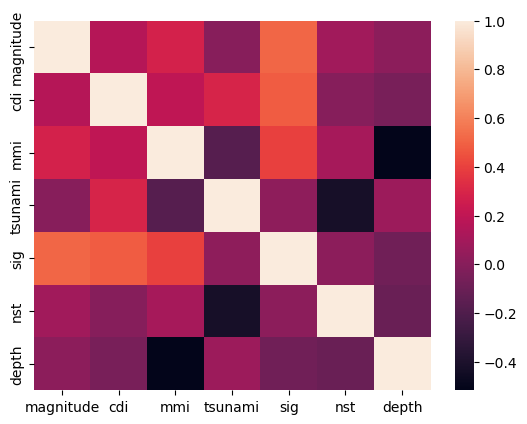

In [13]:
sns.heatmap(dataset.corr())

In [14]:
features = dataset.drop(columns="sig")
target = dataset.sig
print(features.info)
print(target.info)

<bound method DataFrame.info of      magnitude  cdi  mmi  tsunami  nst    depth
0          6.5    7    4        0  114  192.955
1          6.5    8    6        0   92   69.727
2          6.6    7    5        0   70  171.371
3          7.2    6    6        1  173   32.571
4          7.3    0    5        1   79   21.000
..         ...  ...  ...      ...  ...      ...
995        7.1    0    9        0    0   11.000
996        7.7    0    4        0    0   20.200
997        6.9    0    6        0    0   11.200
998        6.6    0    9        0    0   14.000
999        7.1    0    7        0    0   16.000

[1000 rows x 6 columns]>
<bound method Series.info of 0      657
1      775
2      899
3      860
4      820
      ... 
995    776
996    912
997    732
998    670
999    776
Name: sig, Length: 1000, dtype: int64>


In [15]:
training_features, testing_features, training_target, testing_target = train_test_split(features, target, test_size=0.2, random_state=0)

In [16]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(training_features, training_target)
predicted_of_linear_regression_model = linear_regression_model.predict(testing_features)
print(r2_score(testing_target, predicted_of_linear_regression_model))
print(mean_squared_error(testing_target, predicted_of_linear_regression_model))
print(mean_absolute_error(testing_target, predicted_of_linear_regression_model))

0.40087830490978393
58425.99871681048
139.5480528914305


In [17]:
SVR_model_rbf = SVR(kernel="rbf")
SVR_model_rbf.fit(training_features, training_target)
predicted_of_SVR_model_rbf = SVR_model_rbf.predict(testing_features)
print(r2_score(testing_target, predicted_of_SVR_model_rbf))
print(mean_squared_error(testing_target, predicted_of_SVR_model_rbf))
print(mean_absolute_error(testing_target, predicted_of_SVR_model_rbf))

-0.121881953148121
109405.27457476706
164.4811110340445


In [18]:
SVR_model_linear = SVR(kernel="linear")
SVR_model_linear.fit(training_features, training_target)
predicted_of_SVR_model_linear = SVR_model_linear.predict(testing_features)
print(r2_score(testing_target, predicted_of_SVR_model_linear))
print(mean_squared_error(testing_target, predicted_of_SVR_model_linear))
print(mean_absolute_error(testing_target, predicted_of_SVR_model_linear))

0.16585906725776356
81344.93787392956
116.20688846529265


In [19]:
SVR_model_poly = SVR(kernel="poly")
SVR_model_poly.fit(training_features, training_target)
predicted_of_SVR_model_poly = SVR_model_poly.predict(testing_features)
print(r2_score(testing_target, predicted_of_SVR_model_poly))
print(mean_squared_error(testing_target, predicted_of_SVR_model_poly))
print(mean_absolute_error(testing_target, predicted_of_SVR_model_poly))

-0.11251840414526115
108492.14673027545
163.80098750653863


In [20]:
SVR_model_sigmoid = SVR(kernel="sigmoid")
SVR_model_sigmoid.fit(training_features, training_target)
predicted_of_SVR_model_sigmoid = SVR_model_sigmoid.predict(testing_features)
print(r2_score(testing_target, predicted_of_SVR_model_sigmoid))
print(mean_squared_error(testing_target, predicted_of_SVR_model_sigmoid))
print(mean_absolute_error(testing_target, predicted_of_SVR_model_sigmoid))

-0.11930728351534436
109154.19429192373
164.571414297331


In [21]:
DTR_model = DecisionTreeRegressor()
DTR_model.fit(training_features, training_target)
predicted_of_DTR_model = DTR_model.predict(testing_features)
print(r2_score(testing_target, predicted_of_DTR_model))
print(mean_squared_error(testing_target, predicted_of_DTR_model))
print(mean_absolute_error(testing_target, predicted_of_DTR_model))

# export_graphviz(DTR_model, out_file="tree.dot")
# plot_tree(DTR_model)

-0.12124686604080659
109343.34125
139.0225


In [24]:
RFR_model = RandomForestRegressor(oob_score=True)
RFR_model.fit(training_features, training_target)
predicted_of_RFR_model = RFR_model.predict(testing_features)
print(r2_score(testing_target, predicted_of_RFR_model))
print(mean_squared_error(testing_target, predicted_of_RFR_model))
print(mean_absolute_error(testing_target, predicted_of_RFR_model))

print(RFR_model.oob_score_)

print(100-(mean_absolute_error(testing_target, predicted_of_RFR_model)*100)/(max(target)-min(target)))

0.3282359527191513
65510.03858827082
113.71835666666666
0.5022724711216573
94.96821430678466


In [23]:
population_data = pd.read_csv("population_data.csv")
augmented_dataset = pd.concat([dataset, population_data], axis=1)
# print(augmented_dataset.head())
augmented_dataset.to_csv("augmented_dataset.csv", index=False)
